In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [24]:
data = pd.DataFrame({
    'ad_version': ['A'] * 1000 + ['B'] * 1000,
    'clicks': np.concatenate([
        np.random.binomial(1, 0.05, 1000),  # 5% click rate for version A
        np.random.binomial(1, 0.07, 1000)   # 7% click rate for version B
    ]),
    'conversions': np.concatenate([
        np.random.binomial(1, 0.02, 1000),  # 2% conversion rate for version A
        np.random.binomial(1, 0.03, 1000)   # 3% conversion rate for version B
    ])
})

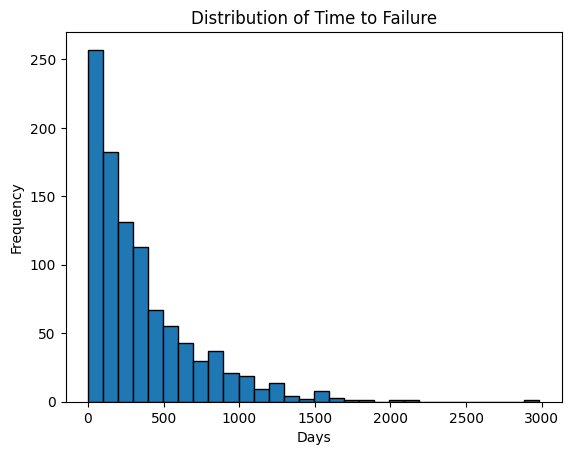

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='ad_version', hue='clicks', data=data)
plt.title('Clicks by Ad Version')

plt.subplot(1, 2, 2)
sns.countplot(x='ad_version', hue='conversions', data=data)
plt.title('Conversions by Ad Version')

plt.tight_layout()
plt.show()

In [26]:
ctr = data.groupby('ad_version')['clicks'].mean()
conversion_rate = data.groupby('ad_version')['conversions'].mean()

print(f"CTR:\n{ctr}")
print(f"Conversion Rate:\n{conversion_rate}")

CTR:
ad_version
A    0.046
B    0.080
Name: clicks, dtype: float64
Conversion Rate:
ad_version
A    0.019
B    0.024
Name: conversions, dtype: float64


In [27]:
from scipy.stats import chi2_contingency

# Clicks contingency table
clicks_contingency = pd.crosstab(data['ad_version'], data['clicks'])
chi2_clicks, p_clicks, _, _ = chi2_contingency(clicks_contingency)
print(f"Clicks: Chi2 = {chi2_clicks}, p-value = {p_clicks}")

# Conversions contingency table
conversions_contingency = pd.crosstab(data['ad_version'], data['conversions'])
chi2_conversions, p_conversions, _, _ = chi2_contingency(conversions_contingency)
print(f"Conversions: Chi2 = {chi2_conversions}, p-value = {p_conversions}")

Clicks: Chi2 = 9.223967068150632, p-value = 0.002388674162016227
Conversions: Chi2 = 0.3802688025097741, p-value = 0.5374594129093846
